In [ ]:
#

In [ ]:
In this project, we will discuss the cases of imbalanced datasets in machine learning problems. The first step involves choosing three datasets that are balanced. The three data set will be made imbalanced using subsampling techniques (low imbalance, medium imbalance, and high imbalance). 9 data sets will be created using the three datasets. Models will be created using these 9 data sets. The models created were random forest and K means. The models created show that the models created using high balance produced the highest accurate model compared to medium and low balance. 

# Introduction


Machine learning is one of the emerging techniques that are being used by almost every sector to create models that can provide insights to businesses. There are several techniques that can be used to create models based on the problems. There are three main types of machine learning techniques. They include supervised, unsupervised, and reinforcement learning (El Naqa & Murphy, 2015; Wang et al. 2016; Jordan & Mitchell, 2015). Classification problems are part of supervised machine learning techniques. Classification problems predict the class label. The class labels are categorical variables. The classification algorithms predict the input data based on the target variable (Kaur, Pannu & Malhi, 2019; Krawczyk, 2016). 
One of the issues that affect classification problems is the issue of the imbalanced class dataset. Imbalance data is one of the common issues with classification problems. The issue of data imbalance always affects the accuracy of the model (Gu et al. 2008). 
Data imbalanced refers to the issues where the target has an even distribution of observations. This means that one class label has a very high observation compared to the other class label. Most of the classifications have imbalanced data. For instance, in the scenario of fraud detection or credit default, we can’t find data that has a balanced class. Cases of fraud are usually rare. Likewise, cases of default are always fewer compared to the normal state (Tyagi & Mittal, 2020; Sun, Wong & Kamel, 2009). 
In this project, we will study the effect of imbalance data. We will collect three balanced data, surrogate the data into three, clean the data and create a model for the same. 


In [7]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


# Data

In [33]:
# load the data
forestfires = pd.read_csv("forestfires.csv")
wine= pd.read_csv("winequality-red.csv")
por=pd.read_csv("student-por.csv", sep=";")
mat=pd.read_csv("student-mat.csv", sep=";")

In [9]:
# merge por and mat data
student= pd.concat((por, mat), axis=0)
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [10]:
print(wine.shape, forestfires.shape, student.shape)

(1599, 12) (517, 13) (1044, 33)


## Wine quality


The wine quality data set was obtained from the Kaggle website (https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009). The data contains information on both red and white wine which are variants of the Portuguese “Vinho Verde" wine. The data can be used to solve both classification and regression tasks. The classes of the data are ordered and thus not balanced. However, through the data cleaning process, we obtained balanced data. The data contains 1599 rows and 12 columns. The target variable has been labeled “quality”. It is an ordinal variable that ranges from 3-8. This target variable was divided into classes (0,1). The threshold of dividing the data into the two classes was on average. Thus, the threshold value was 5. The data had no missing values and all the remaining columns were numeric. Thus, there were no further data cleaning techniques were applied. All the remaining variables were treated as independent variables.


In [34]:
# Data Cleaning
#1. Wine data
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [35]:
# conver the quality to category
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [36]:
wine['quality'].values[wine['quality'].values <= 5] = 0
wine['quality'].values[wine['quality'].values > 5] = 1

wine.quality.value_counts()



1    855
0    744
Name: quality, dtype: int64

In [37]:
# create low balance
high= wine[wine.quality==1]
low= wine[wine.quality==0]

In [38]:
count_class_0, count_class_1 = wine.quality.value_counts()
print(count_class_0, count_class_1)

855 744


In [39]:
df_class_0_under = low.sample(round(wine.shape[0]*0.35))
wine_low = pd.concat([df_class_0_under, high], axis=0)
df_class_0_medium = low.sample(round(wine.shape[0]*0.25))
wine_medium = pd.concat([df_class_0_medium, high], axis=0)
df_class_0_high = low.sample(round(wine.shape[0]*0.1))
wine_high = pd.concat([df_class_0_high, high], axis=0)
print(wine_low.quality.value_counts())
print(wine_medium.quality.value_counts())
print(wine_high.quality.value_counts())

1    855
0    560
Name: quality, dtype: int64
1    855
0    400
Name: quality, dtype: int64
1    855
0    160
Name: quality, dtype: int64


## Forest Fires


The forest fire data set was collected from Kaggle website (https://www.kaggle.com/sumitm004/forest-fire-area). The data contains 517 fires from Montesinho natural park in Portugal. The data contains information about the weekday, the month, the coordinate, and the burn area of when the incident occurred. The data contains 517 rows and 13 columns. The target variable is the area. Out of the 13 variables, 2 are object variables. This data can be used to handle classification, regression, and clustering problems. The data was cleaned by converting the object variables to numeric variables. This is because machine learning models don’t accept object variables. The target variable is a numeric variable. It was converted to a binary variable. The final data obtained was balanced. The X and Y-axis spatial coordinates seemed not be important in the model and thus they were dropped from the data.


In [40]:
# Forest fire clean up
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [41]:
forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [42]:
# convert the object into numeric
forestfires['month']=pd.to_datetime(forestfires.month, format='%b').dt.month
days = {"mon":0,"tue":1,"wed":2,"thu":3,"fri":4,"sat":5,"sun":6}
forestfires['day'] = forestfires['day'].apply(lambda x: days[x])
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


In [43]:
# check for missing value
forestfires.isna().sum().sum()

0

In [46]:
# drop X and Y variable
forestfires.drop(['X','Y'], axis=1, inplace=True)

In [47]:
forestfires['area'].values[forestfires['area'].values < 1] = 0
forestfires['area'].values[forestfires['area'].values >= 1] = 1

forestfires.area.value_counts()


0.0    274
1.0    243
Name: area, dtype: int64

In [48]:
# create the subsample
high= forestfires[forestfires.area==1]
low= forestfires[forestfires.area==0]
count_class_0, count_class_1 = forestfires.area.value_counts()
df_class_0_under = low.sample(round(forestfires.shape[0]*0.35))
forest_low = pd.concat([df_class_0_under, high], axis=0)
df_class_0_medium = low.sample(round(forestfires.shape[0]*0.25))
forest_medium = pd.concat([df_class_0_medium, high], axis=0)
df_class_0_high = low.sample(round(forestfires.shape[0]*0.1))
forest_high = pd.concat([df_class_0_high, high], axis=0)
print(forest_low.area.value_counts())
print(forest_medium.area.value_counts())
print(forest_high.area.value_counts())


1.0    243
0.0    181
Name: area, dtype: int64
1.0    243
0.0    129
Name: area, dtype: int64
1.0    243
0.0     52
Name: area, dtype: int64


## Student performance


This data was obtained UCI respiratory (https://archive.ics.uci.edu/ml/datasets/student+performance). The data is about the secondary student performance in two Portuguese schools. The data gives information on the grades, demographics, social and school-related features. It was initially collected using a questionnaire. The data can be used to solve both regression and classification problems. The target variable is labeled G3 which stands for the final grade. The data contains 649 rows and 33 variables. Out of the 33 variables, 17 were object variables. There were two data set given on the website for the two schools. The two data wer concatenated into one data. These variables were converted to numeric variables. The target variable was converted to binary. The threshold used to divide the variables into binary was 12. The final data was balanced data. 



In [49]:
# Student data
student.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [50]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# subset columns that are non-numeric
non_numeric = student.select_dtypes(exclude=numerics)
non_numeric.head()
# get the columns names
cat= non_numeric.columns
cat

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [51]:
# conver to numeric
le = LabelEncoder()
for i in cat:
     student[i] = le.fit_transform(student[i])
student.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      1044 non-null   int32
 1   sex         1044 non-null   int32
 2   age         1044 non-null   int64
 3   address     1044 non-null   int32
 4   famsize     1044 non-null   int32
 5   Pstatus     1044 non-null   int32
 6   Medu        1044 non-null   int64
 7   Fedu        1044 non-null   int64
 8   Mjob        1044 non-null   int32
 9   Fjob        1044 non-null   int32
 10  reason      1044 non-null   int32
 11  guardian    1044 non-null   int32
 12  traveltime  1044 non-null   int64
 13  studytime   1044 non-null   int64
 14  failures    1044 non-null   int64
 15  schoolsup   1044 non-null   int32
 16  famsup      1044 non-null   int32
 17  paid        1044 non-null   int32
 18  activities  1044 non-null   int32
 19  nursery     1044 non-null   int32
 20  higher      1044 non-null   int

In [52]:
# check for presence of missing values
student.isna().sum().sum()

0

In [53]:
#Convert G3 to category
student['G3'].values[student['G3'].values <12] = 0
student['G3'].values[student['G3'].values >= 12] = 1

student.G3.value_counts()



0    534
1    510
Name: G3, dtype: int64

## Methodology


Based on the tasks given, we were supposed to solve 6 tasks. The first task involved subsampling the three data into three each. The subsampling techniques are aimed at making the data imbalance. One of the classes will be reduced to make the data imbalanced. The subsampling will be categorized into three: Low imbalance where one of the classes will carry 65 % of the sample size, medium imbalance where one of the classes will carry 75 % of the sample size, and lastly, the high imbalance which one of the samples will carry 90 % of the sample size. We will, therefore, have 9 subsampled data sets. These are the data sets that will be used to carry out the analysis.
The second task involved performing stratified cross-validation on each of the datasets and their surrogates and training a random forest. The accuracy metric was used to validate the model. The third task involved creating 10 stratified folds for the data and creating the same model. To solve this, we created a function to perform cross-validation and random forest and also a function to perform cross-validation together with the cross-validation and random forest. This function will be passed through all 9 data sets. The dependent and independent variables for the 9 datasets were determined. The model was validated using an accuracy score. The fourth part involved creating Kmeans and determining the best clusters using Elbow and Silhouette method. The best cluster was used to create the K-means model. Later, the random forest was modeled using the clusters. A random forest model was also created on the clusters cross-validation. The performance of the final model and the previous model was compared using a bar chart. 







In [54]:
# create a subsample
# create the subsample
high= student[student.G3==1]
low= student[student.G3==0]
count_class_0, count_class_1 = student.G3.value_counts()
df_class_0_under = low.sample(round(student.shape[0]*0.35))
student_low = pd.concat([df_class_0_under, high], axis=0)
df_class_0_medium = low.sample(round(student.shape[0]*0.25))
student_medium = pd.concat([df_class_0_medium, high], axis=0)
df_class_0_high = low.sample(round(student.shape[0]*0.1))
student_high = pd.concat([df_class_0_high, high], axis=0)
print(student_low.G3.value_counts())
print(student_medium.G3.value_counts())
print(student_high.G3.value_counts())


1    510
0    365
Name: G3, dtype: int64
1    510
0    261
Name: G3, dtype: int64
1    510
0    104
Name: G3, dtype: int64


# TASK 2

In [55]:
# create y and X variables for the 9 data
# Wine
y_wine_low= wine_low.quality
X_wine_low= wine_low.drop("quality", axis=1)
y_wine_medium= wine_medium.quality
X_wine_medium= wine_medium.drop("quality", axis=1)
y_wine_high= wine_high.quality
X_wine_high= wine_high.drop("quality", axis=1)
#wine_medium
# forest fire
y_forest_low= forest_low.area
X_forest_low= forest_low.drop("area", axis=1)
y_forest_medium= forest_medium.area
X_forest_medium= forest_medium.drop("area", axis=1)
y_forest_high= forest_high.area
X_forest_high= forest_high.drop("area", axis=1)
# student
y_student_low= student_low.G3
X_student_low= student_low.drop("G3", axis=1)
y_student_medium= student_medium.G3
X_student_medium= student_medium.drop("G3", axis=1)
y_student_high= student_high.G3
X_student_high= student_high.drop("G3", axis=1)



In [73]:
n_scores

array([0.83802817, 0.78873239, 0.82394366, 0.8028169 , 0.80985915,
       0.82978723, 0.80141844, 0.82269504, 0.82269504, 0.85815603,
       0.8028169 , 0.78169014, 0.81690141, 0.84507042, 0.83802817,
       0.81560284, 0.78014184, 0.87234043, 0.79432624, 0.77304965,
       0.81690141, 0.80985915, 0.83802817, 0.83802817, 0.83098592,
       0.82269504, 0.80141844, 0.76595745, 0.80141844, 0.85815603])

Accuracy: 0.817 (0.025)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       560
           1       1.00      1.00      1.00       855

    accuracy                           1.00      1415
   macro avg       1.00      1.00      1.00      1415
weighted avg       1.00      1.00      1.00      1415



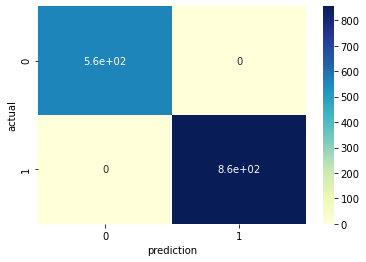

In [72]:
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_wine_low, y_wine_low, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
model.fit(X_wine_low,y_wine_low)
pred= model.predict(X_wine_low)
cm = confusion_matrix(y_wine_low, pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.ylabel('actual')
plt.xlabel('prediction')

print(classification_report(y_wine_low, pred))
#X_wine_low,y_wine_low

In [74]:
def Accuracy(X,y):
    model=RandomForestClassifier()
    n_scores = cross_val_score(model, X, y, scoring='accuracy', n_jobs=-1, error_score='raise')
    print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    
    

In [75]:
Accuracy(X_forest_low,y_forest_low)
Accuracy(X_forest_medium,y_forest_medium)
Accuracy(X_forest_high,y_forest_high)

Accuracy: 0.420 (0.068)
Accuracy: 0.519 (0.052)
Accuracy: 0.756 (0.041)


In [76]:
# Wine quality
Accuracy(X_wine_low,y_wine_low)
Accuracy(X_wine_medium,y_wine_medium)
Accuracy(X_wine_high,y_wine_high)

Accuracy: 0.751 (0.061)
Accuracy: 0.761 (0.048)
Accuracy: 0.830 (0.044)


In [77]:
# Student
Accuracy(X_student_low,y_student_low)
Accuracy(X_student_medium,y_student_medium)
Accuracy(X_student_high,y_student_high)

Accuracy: 0.929 (0.015)
Accuracy: 0.904 (0.023)
Accuracy: 0.946 (0.017)


# TASK 3

In [78]:
def Accuracy(X,y):
    model=RandomForestClassifier()
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    

In [79]:
Accuracy(X_forest_low,y_forest_low)
Accuracy(X_forest_medium,y_forest_medium)
Accuracy(X_forest_high,y_forest_high)

Accuracy: 0.538 (0.076)
Accuracy: 0.606 (0.077)
Accuracy: 0.788 (0.046)


In [99]:
# Wine quality
Accuracy(X_wine_low,y_wine_low)
Accuracy(X_wine_medium,y_wine_medium)
Accuracy(X_wine_high,y_wine_high)

Accuracy: 0.816 (0.025)
Accuracy: 0.827 (0.033)
Accuracy: 0.874 (0.021)


In [100]:
# Student
Accuracy(X_student_low,y_student_low)
Accuracy(X_student_medium,y_student_medium)
Accuracy(X_student_high,y_student_high)

Accuracy: 0.924 (0.025)
Accuracy: 0.922 (0.026)
Accuracy: 0.960 (0.025)


# TASK 4

In [125]:
Xwine = wine.drop("quality", axis=1)
Xstudent= student.drop("G3", axis=1)
Xforestfires= forestfires.drop("area", axis=1)
def clusters(X):
    score = []

    for i in range(1,11):
        kmeans = KMeans(n_clusters = i, init="k-means++", random_state=10)
        kmeans.fit(X)
        score.append(kmeans.inertia_)
    plt.plot(range(1,11), score)
    plt.title('The Elbow Method')
    plt.xlabel('no of clusters')
    plt.ylabel('wcss')
    plt.show()
    for i in range(2,11):
        clusterer = KMeans(n_clusters=i, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", i,
              "The average silhouette_score is :", silhouette_avg)

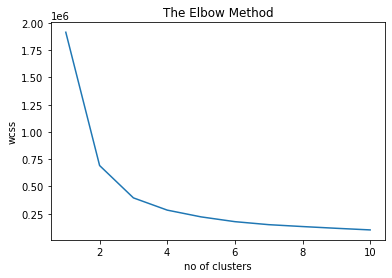

For n_clusters = 2 The average silhouette_score is : 0.6034220347331241
For n_clusters = 3 The average silhouette_score is : 0.5197446557038226
For n_clusters = 4 The average silhouette_score is : 0.48545959739918065
For n_clusters = 5 The average silhouette_score is : 0.44642187844374576
For n_clusters = 6 The average silhouette_score is : 0.44666936016609643
For n_clusters = 7 The average silhouette_score is : 0.39410072475409114
For n_clusters = 8 The average silhouette_score is : 0.38911679534376437
For n_clusters = 9 The average silhouette_score is : 0.386305674181591
For n_clusters = 10 The average silhouette_score is : 0.38417972334579154


In [120]:
clusters(Xwine)

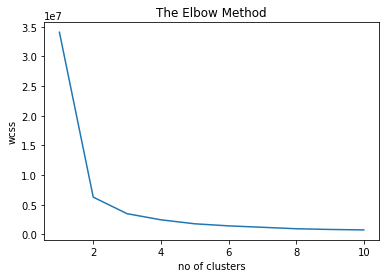

For n_clusters = 2 The average silhouette_score is : 0.7422197992016334
For n_clusters = 3 The average silhouette_score is : 0.6391388104743568
For n_clusters = 4 The average silhouette_score is : 0.4349782045852993
For n_clusters = 5 The average silhouette_score is : 0.47913680584176754
For n_clusters = 6 The average silhouette_score is : 0.46913728986821723
For n_clusters = 7 The average silhouette_score is : 0.44454211412839506
For n_clusters = 8 The average silhouette_score is : 0.4770155037971883
For n_clusters = 9 The average silhouette_score is : 0.4838726390387534
For n_clusters = 10 The average silhouette_score is : 0.4232886814019637


In [126]:
clusters(Xforestfires)

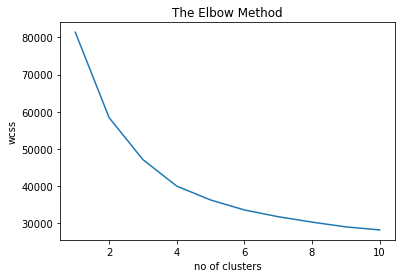

For n_clusters = 2 The average silhouette_score is : 0.3850472028380238
For n_clusters = 3 The average silhouette_score is : 0.2130058681834083
For n_clusters = 4 The average silhouette_score is : 0.21959229247637915
For n_clusters = 5 The average silhouette_score is : 0.20146484769659018
For n_clusters = 6 The average silhouette_score is : 0.15134832428186404
For n_clusters = 7 The average silhouette_score is : 0.14463656628798813
For n_clusters = 8 The average silhouette_score is : 0.14065764242340656
For n_clusters = 9 The average silhouette_score is : 0.12800057481274524
For n_clusters = 10 The average silhouette_score is : 0.10868064339606143


In [127]:
clusters(Xstudent)

In [130]:
# create Kmeans
kmeans = KMeans(n_clusters = 2, init="k-means++", random_state=10)
kmeans.fit(X_forest_low)

KMeans(n_clusters=2, random_state=10)

In [137]:
def get_sample(X):
    kmeans = KMeans(n_clusters = 2, init="k-means++", random_state=10)
    kmeans.fit(X)
    kmeans.cluster_centers_
    data = pd.DataFrame(X)
    pred = kmeans.predict(X)
    data['cluster']=pred
    print("Sample size of the cluster")
    print(data.cluster.value_counts())

    

In [141]:
print("X_forest_low")
get_sample(X_forest_low)
print("X_forest_medium")
get_sample(X_forest_medium)
print("X_forest_high")
get_sample(X_forest_high)



X_forest_low
Sample size of the cluster
0    322
1    102
Name: cluster, dtype: int64
X_forest_medium
Sample size of the cluster
0    284
1     88
Name: cluster, dtype: int64
X_forest_high
Sample size of the cluster
0    231
1     64
Name: cluster, dtype: int64


In [142]:
print("X_student_low")
get_sample(X_student_low)
print("X_student_medium")
get_sample(X_student_medium)
print("X_student_high")
get_sample(X_student_high)

X_student_low
Sample size of the cluster
0    759
1    116
Name: cluster, dtype: int64
X_student_medium
Sample size of the cluster
1    618
0    153
Name: cluster, dtype: int64
X_student_high
Sample size of the cluster
0    505
1    109
Name: cluster, dtype: int64


In [143]:
# Wine
print("X_wine_low")
get_sample(X_wine_low)
print("X_wine_medium")
get_sample(X_wine_medium)
print("X_wine_high")
get_sample(X_wine_high)

X_wine_low
Sample size of the cluster
0    1053
1     362
Name: cluster, dtype: int64
X_wine_medium
Sample size of the cluster
1    953
0    302
Name: cluster, dtype: int64
X_wine_high
Sample size of the cluster
1    764
0    251
Name: cluster, dtype: int64


In [177]:
# create random forest on the clusters
def get_sample(X):
    kmeans = KMeans(n_clusters = 2, init="k-means++", random_state=10)
    kmeans.fit(X)
    kmeans.cluster_centers_
    data = pd.DataFrame(X)
    pred = kmeans.predict(X)
    return pred
def Accuracy(X,y):
    model=RandomForestClassifier()
    n_scores = cross_val_score(model, X, y, scoring='accuracy', n_jobs=-1, error_score='raise')
    print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
def Accuracy1(X,y):
    model=RandomForestClassifier()
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    
    

In [174]:
y=get_sample(X_forest_low)
Accuracy(X_forest_low,y)
y=get_sample(X_forest_medium)
Accuracy(X_forest_medium,y)
y=get_sample(X_forest_high)
Accuracy(X_forest_high,y)

Accuracy: 1.000 (0.000)
Accuracy: 1.000 (0.000)
Accuracy: 0.997 (0.007)


In [175]:
y=get_sample(X_wine_low)
Accuracy(X_wine_low,y)
y=get_sample(X_wine_medium)
Accuracy(X_wine_medium,y)
y=get_sample(X_wine_high)
Accuracy(X_wine_high,y)

Accuracy: 1.000 (0.000)
Accuracy: 1.000 (0.000)
Accuracy: 1.000 (0.000)


In [176]:
y=get_sample(X_student_low)
Accuracy(X_student_low,y)
y=get_sample(X_student_medium)
Accuracy(X_student_medium,y)
y=get_sample(X_student_high)
Accuracy(X_student_high,y)

Accuracy: 1.000 (0.000)
Accuracy: 0.997 (0.005)
Accuracy: 1.000 (0.000)


# TASK 5

In [178]:
y=get_sample(X_forest_low)
Accuracy1(X_forest_low,y)
y=get_sample(X_forest_medium)
Accuracy1(X_forest_medium,y)
y=get_sample(X_forest_high)
Accuracy1(X_forest_high,y)

Accuracy: 1.000 (0.000)
Accuracy: 1.000 (0.000)
Accuracy: 0.998 (0.008)


In [179]:
y=get_sample(X_wine_low)
Accuracy1(X_wine_low,y)
y=get_sample(X_wine_medium)
Accuracy1(X_wine_medium,y)
y=get_sample(X_wine_high)
Accuracy1(X_wine_high,y)

Accuracy: 1.000 (0.000)
Accuracy: 1.000 (0.000)
Accuracy: 1.000 (0.000)


In [180]:
y=get_sample(X_student_low)
Accuracy1(X_student_low,y)
y=get_sample(X_student_medium)
Accuracy1(X_student_medium,y)
y=get_sample(X_student_high)
Accuracy1(X_student_high,y)

Accuracy: 1.000 (0.000)
Accuracy: 0.999 (0.003)
Accuracy: 0.999 (0.003)


# TASK 6

In [11]:
data = {
        'Metric1': [0.474, 0.527, 0.78, 0.748,0.765,0.858,0.923,0.917,0.959],
        'Metric2': [1, 1, 0.998, 1,1,1,1,0.9,0.9]}  
Class=['Forest low', 'Forest medium', 'Forest high', 'Wine low','Wine medium','Wine high','Student low', 'student medium', 'student high']
df = pd.DataFrame(data)  
df

,Metric1,Metric2
0,0.474,1.000
1,0.527,1.000
2,0.780,0.998
3,0.748,1.000
4,0.765,1.000
5,0.858,1.000
6,0.923,1.000
7,0.917,0.900
8,0.959,0.900


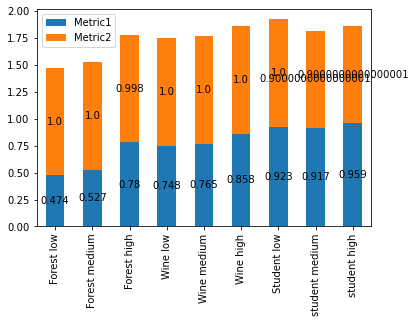

In [22]:

from matplotlib.pyplot import figure



ax = df.plot(stacked=True, kind='bar')
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    
# Set Tick labels


ax.set_xticklabels(Class,rotation='vertical')

# Display chart

plt.show()

# Conclusions

We can notice from the graph that the low imbalance produced the lowest accuracy compared to medium imbalance and high imbalance. The reason why the high imbalance has the highest accuracy is that one has a very high accurate prediction compared to the other. From the formula of calculating the accuracy score, both classes play a major role in determining the accuracy of the model. If one class has a very high accurate prediction, it covers up for the other class. We can also notice from the modeled created using clusters that the accuracy of the model increases when the clusters are used. Clustering techniques use the concept of homogeneity of the data points. You will find that the data point for specific classes is closer to one another compared to the other class.  This is why Kmeans clustering is also a good technique for data modeling. A combination of Kmeans and random forest produced a highly accurate prediction

# Reference


El Naqa, I., & Murphy, M. J. (2015). What is machine learning?. In machine learning in radiation oncology (pp. 3-11). Springer, Cham.

Jordan, M. I., & Mitchell, T. M. (2015). Machine learning: Trends, perspectives, and prospects. Science, 349(6245), 255-260.

Kaur, H., Pannu, H. S., & Malhi, A. K. (2019). A systematic review on imbalanced data challenges in machine learning: Applications and solutions. ACM Computing Surveys (CSUR), 52(4), 1-36.

Krawczyk, B. (2016). Learning from imbalanced data: open challenges and future directions. Progress in Artificial Intelligence, 5(4), 221-232.

Gu, Q., Cai, Z., Zhu, L., & Huang, B. (2008, December). Data mining on imbalanced data sets. In 2008 International Conference on advanced computer theory and engineering (pp. 1020-1024). IEEE.

Sun, Y., Wong, A. K., & Kamel, M. S. (2009). Classification of imbalanced data: A review. International journal of pattern recognition and artificial intelligence, 23(04), 687-719.

Tyagi, S., & Mittal, S. (2020). Sampling approaches for imbalanced data classification problem in machine learning. In Proceedings of ICRIC 2019 (pp. 209-221). Springer, Cham.

Wang, H., Lei, Z., Zhang, X., Zhou, B., & Peng, J. (2016). Machine learning basics. Deep learning, 98-164.
